In [1]:
# Essentially we hope to create a model based off our dataset that can predict the most deadly diseases in (X) years for each 
# country. Preliminary Data Processing included binary encoding string values in the dataframe and scaling the data. 
# A new column (Max Cause of Death) was created and used as our X variable in the linear regression model. 
# The Y values included all of the other columns in our preliminary model and the data was split into
# 70%/30% training and testing data. Our preliminary model was only 30% accurate, so we have incorporated seaborn visualizations
# to help us view which columns to drop in order to improve our model's accuracy.
# We chose a superverised learning linear regression model to predict which disease will be the "Max" and what that number will
# look like. The cons of a linear regression model are that we are assuming there is a linear relationship between mortality rate and deaths. This also means that we may overfit this data. 

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
import pandas as pd
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Read in Data and view it: this dataframe will be updated to a new complete one made in SQL
Cause_df = pd.read_csv("../raw_data/merge_tables_output.csv")
Cause_df = Cause_df.rename(columns={'Code':'Country Code'})
Cause_df.head(50)

,index,Entity,Country Code,Year,Age_Group,Neoplasms,Tuberculosis,HIV/AIDS,Drowning,Malaria,Parkinsons_disease,Self
0,0,Afghanistan,AFG,1990,Under 5,431,808,10,776,21,0,0
1,1,Afghanistan,AFG,1991,Under 5,439,800,12,748,41,0,0
2,2,Afghanistan,AFG,1992,Under 5,486,863,13,777,51,0,0
3,3,Afghanistan,AFG,1993,Under 5,549,979,16,872,24,0,0
4,4,Afghanistan,AFG,1994,Under 5,589,1064,19,961,52,0,0
5,5,Afghanistan,AFG,1995,Under 5,605,1095,22,1004,44,0,0
6,6,Afghanistan,AFG,1996,Under 5,624,1135,24,1050,46,0,0
7,7,Afghanistan,AFG,1997,Under 5,649,1173,26,1109,65,0,0
8,8,Afghanistan,AFG,1998,Under 5,640,1150,28,1109,155,0,0
9,9,Afghanistan,AFG,1999,Under 5,617,1104,29,1085,128,0,0


In [5]:
# Read in population data and view it
country_pop_df = pd.read_csv("../raw_data/country_pop.csv")
country_pop_df = country_pop_df.rename(columns={'years':'Year'})
country_pop_df.head()

,Country Code,Year,population
0,AFG,1990,12412311.0
1,AFG,1991,13299016.0
2,AFG,1992,14485543.0
3,AFG,1993,15816601.0
4,AFG,1994,17075728.0


In [7]:
Cause_df = pd.merge(Cause_df,country_pop_df, on=['Country Code', 'Year'])
Cause_df.head(50)

,index,Entity,Country Code,Year,Age_Group,Neoplasms,Tuberculosis,HIV/AIDS,Drowning,Malaria,Parkinsons_disease,Self,population
0,0,Afghanistan,AFG,1990,Under 5,431,808,10,776,21,0,0,12412311.0
1,0,Afghanistan,AFG,1990,15-49,482,234,46,2078,1208,15,0,12412311.0
2,0,Afghanistan,AFG,1990,5-14,12,290,3,278,160,0,0,12412311.0
3,0,Afghanistan,AFG,1990,50-69,167,55,1451,7,19,5446,0,12412311.0
4,0,Afghanistan,AFG,1990,70,35,14,1034,1,5,3346,0,12412311.0
5,1,Afghanistan,AFG,1991,Under 5,439,800,12,748,41,0,0,13299016.0
6,1,Afghanistan,AFG,1991,15-49,535,262,94,2183,1289,19,0,13299016.0
7,1,Afghanistan,AFG,1991,5-14,12,311,6,299,170,0,0,13299016.0
8,1,Afghanistan,AFG,1991,50-69,168,55,1447,8,38,5493,0,13299016.0
9,1,Afghanistan,AFG,1991,70,35,14,1036,1,11,3382,0,13299016.0


<AxesSubplot:>

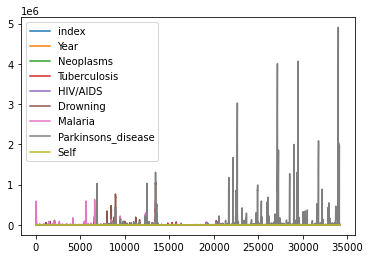

In [5]:
# Attempt to plot
Cause_df.plot()

In [6]:
# Encode Labels for SciKit Learn
le = LabelEncoder()
df2=Cause_df.copy()
df2["Entity"] = le.fit_transform(df2["Entity"])
df2["Code"] = le.fit_transform(df2["Code"])
# View Results (Bottom Half)
df2.tail()

,index,Entity,Code,Year,Age_Group,Neoplasms,Tuberculosis,HIV/AIDS,Drowning,Malaria,Parkinsons_disease,Self
34195,6835,227,204,2015,70,226,44,2073,458,28,3488,0
34196,6836,227,204,2016,70,229,45,2027,454,26,3573,0
34197,6837,227,204,2017,70,230,45,1985,437,28,3654,0
34198,6838,227,204,2018,70,229,46,1952,416,28,3748,0
34199,6839,227,204,2019,70,222,47,1930,408,29,3843,0


In [7]:
# Encode Age_Group to binary numbers
df2_binary_encoded = pd.get_dummies(df2, columns=["Age_Group"])
df2_binary_encoded.head()


,index,Entity,Code,Year,Neoplasms,Tuberculosis,HIV/AIDS,Drowning,Malaria,Parkinsons_disease,Self,Age_Group_15-49,Age_Group_5-14,Age_Group_50-69,Age_Group_70,Age_Group_Under 5
0,0,0,0,1990,431,808,10,776,21,0,0,0,0,0,0,1
1,1,0,0,1991,439,800,12,748,41,0,0,0,0,0,0,1
2,2,0,0,1992,486,863,13,777,51,0,0,0,0,0,0,1
3,3,0,0,1993,549,979,16,872,24,0,0,0,0,0,0,1
4,4,0,0,1994,589,1064,19,961,52,0,0,0,0,0,0,1


In [8]:
# Begin Scaling Process
data_scaler = StandardScaler()
df2_scaled = data_scaler.fit_transform(df2_binary_encoded)
df2_scaled

array([[-1.7317976 , -1.72447068, -1.75289789, ..., -0.5       ,
        -0.5       ,  2.        ],
       [-1.73129115, -1.72447068, -1.75289789, ..., -0.5       ,
        -0.5       ,  2.        ],
       [-1.73078471, -1.72447068, -1.75289789, ..., -0.5       ,
        -0.5       ,  2.        ],
       ...,
       [ 1.73078471,  1.72447068,  1.42879135, ..., -0.5       ,
         2.        , -0.5       ],
       [ 1.73129115,  1.72447068,  1.42879135, ..., -0.5       ,
         2.        , -0.5       ],
       [ 1.7317976 ,  1.72447068,  1.42879135, ..., -0.5       ,
         2.        , -0.5       ]])

In [9]:
# Verify Means and Standard Deviations of each Column (Should be 0/1)
# for loop in df2_scaled:
#     for y in loop:
#         print(np.mean(df2_scaled[:,]))
#         print(np.std(df2_scaled[:,]))


    
    

In [10]:
#Double Check random Column Mean/STD
print(np.mean(df2_scaled[:,7]))
print(np.std(df2_scaled[:,7]))
    

-2.49313240617579e-18
1.0


###### I believe there is an issue with our Y variable. Its not including the population data for the countries. Looks like the table is present on SQL, but not on 'merge_tables_output.csv'

###### If adding the population to match our data in order to figure out our Y variable. Since this variable should be a dependent variable based on X data, maybe use np.average? And call this average our own concept/index of "AVERAGE MORTALITY"?

In [11]:
# Create new Column showing the Highest Cause of Death Per Year Per Country
df2_binary_encoded['AVERAGE MORTALITY']=df2_binary_encoded[['Neoplasms','Tuberculosis','HIV/AIDS','Drowning','Malaria','Parkinsons_disease','Self']].apply(np.mean,axis=1)
df2_binary_encoded.tail(22)

,index,Entity,Code,Year,Neoplasms,Tuberculosis,HIV/AIDS,Drowning,Malaria,Parkinsons_disease,Self,Age_Group_15-49,Age_Group_5-14,Age_Group_50-69,Age_Group_70,Age_Group_Under 5,AVERAGE MORTALITY
34178,6818,227,204,1998,189,40,1572,1607,150,3050,0,0,0,0,1,0,944.000000
34179,6819,227,204,1999,194,41,1648,1754,153,3192,0,0,0,0,1,0,997.428571
34180,6820,227,204,2000,201,42,1685,1844,117,3347,0,0,0,0,1,0,1033.714286
34181,6821,227,204,2001,203,43,1711,1876,110,3400,0,0,0,0,1,0,1049.000000
34182,6822,227,204,2002,207,43,1764,1867,82,3464,0,0,0,0,1,0,1061.000000
34183,6823,227,204,2003,209,43,1843,1819,105,3492,0,0,0,0,1,0,1073.000000
34184,6824,227,204,2004,212,43,1936,1735,110,3532,0,0,0,0,1,0,1081.142857
34185,6825,227,204,2005,214,44,2023,1622,98,3481,0,0,0,0,1,0,1068.857143
34186,6826,227,204,2006,215,44,2100,1483,71,3468,0,0,0,0,1,0,1054.428571
34187,6827,227,204,2007,218,44,2154,1329,115,3475,0,0,0,0,1,0,1047.857143


In [12]:
# Create X Variable Features Set (Max of Next Year)
X=df2_binary_encoded.copy()
X = X.drop(["AVERAGE MORTALITY", "Code", "index"], axis=1)
X.tail(21)

,Entity,Year,Neoplasms,Tuberculosis,HIV/AIDS,Drowning,Malaria,Parkinsons_disease,Self,Age_Group_15-49,Age_Group_5-14,Age_Group_50-69,Age_Group_70,Age_Group_Under 5
34179,227,1999,194,41,1648,1754,153,3192,0,0,0,0,1,0
34180,227,2000,201,42,1685,1844,117,3347,0,0,0,0,1,0
34181,227,2001,203,43,1711,1876,110,3400,0,0,0,0,1,0
34182,227,2002,207,43,1764,1867,82,3464,0,0,0,0,1,0
34183,227,2003,209,43,1843,1819,105,3492,0,0,0,0,1,0
34184,227,2004,212,43,1936,1735,110,3532,0,0,0,0,1,0
34185,227,2005,214,44,2023,1622,98,3481,0,0,0,0,1,0
34186,227,2006,215,44,2100,1483,71,3468,0,0,0,0,1,0
34187,227,2007,218,44,2154,1329,115,3475,0,0,0,0,1,0
34188,227,2008,222,45,2211,1155,58,3499,0,0,0,0,1,0


In [13]:
# Define target
y = df2_binary_encoded["AVERAGE MORTALITY"].values
y[:5]

array([292.28571429, 291.42857143, 312.85714286, 348.57142857,
       383.57142857])

In [14]:
# Checkin shape of X for table structure
X.shape

(34200, 14)

In [15]:
# Checkin shape of y for table structure
y.shape

(34200,)

## SCALE THE DATA

### INPUT DATA

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_scaled

array([[0.00000000e+00, 0.00000000e+00, 7.76309414e-04, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 3.44827586e-02, 7.90718870e-04, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 6.89655172e-02, 8.75374421e-04, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.00000000e+00, 9.31034483e-01, 4.14271845e-04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 9.65517241e-01, 4.12470663e-04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 3.99862390e-04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [18]:
scaler.data_max_

array([2.270000e+02, 2.019000e+03, 5.551910e+05, 2.095620e+05,
       6.015510e+05, 1.065003e+06, 6.315230e+05, 4.909133e+06,
       0.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
       1.000000e+00, 1.000000e+00])

In [19]:
scaler.data_min_

array([   0., 1990.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.])

### OUTPUT DATA

In [20]:
y = y.reshape(-1,1)

In [21]:
y.shape

(34200, 1)

In [22]:
y_scaled = scaler.fit_transform(y)

In [23]:
y_scaled

array([[0.00037611],
       [0.00037501],
       [0.00040258],
       ...,
       [0.00117264],
       [0.00118   ],
       [0.00119103]])

## TRAINING THE MODEL

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.20)

In [25]:
# CHECK TO SEE HOW THE DATA SPLITTED FOR X

In [26]:
X_train.shape

(27360, 14)

In [27]:
X_test.shape

(6840, 14)

In [28]:
# CHECK TO SEE HOW THE DATA SPLITTED FOR Y

In [29]:
y_train.shape

(27360, 1)

In [30]:
y_test.shape

(6840, 1)

In [31]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(25, input_dim = 14, activation = 'relu')) # Default Hidden Layer
model.add(Dense(25, activation = 'relu')) # First Hidden Layer
model.add(Dense(1, activation = 'linear')) # Output Layer, its linear due to regression model

2022-12-12 12:52:43.554727: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                375       
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,051
Trainable params: 1,051
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [34]:
epochs_hist = model.fit(X_train, y_train, epochs = 10, batch_size = 25, verbose = 1, validation_split = 0.2)

Epoch 1/10
876/876 [==============================] - 1s 772us/step - loss: 0.0014 - val_loss: 1.4328e-04
Epoch 2/10
876/876 [==============================] - 1s 702us/step - loss: 7.3734e-05 - val_loss: 4.8293e-05
Epoch 3/10
876/876 [==============================] - 1s 682us/step - loss: 3.1897e-05 - val_loss: 3.5782e-05
Epoch 4/10
876/876 [==============================] - 1s 679us/step - loss: 2.1948e-05 - val_loss: 2.0282e-05
Epoch 5/10
876/876 [==============================] - 1s 675us/step - loss: 1.6753e-05 - val_loss: 1.6348e-05
Epoch 6/10
876/876 [==============================] - 1s 681us/step - loss: 1.3453e-05 - val_loss: 1.1046e-05
Epoch 7/10
876/876 [==============================] - 1s 676us/step - loss: 1.3136e-05 - val_loss: 1.2296e-05
Epoch 8/10
876/876 [==============================] - 1s 721us/step - loss: 1.0504e-05 - val_loss: 6.8684e-06
Epoch 9/10
876/876 [==============================] - 1s 675us/step - loss: 8.8298e-06 - val_loss: 9.1250e-06
Epoch 10/10
87

# EVALUATE MODEL

In [35]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

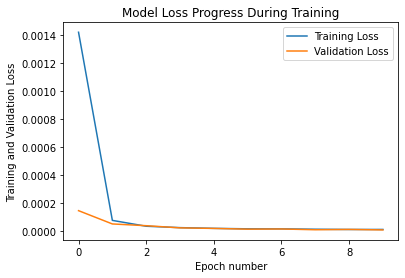

In [36]:
import matplotlib.pyplot as plt

plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

In [37]:
print(X.columns)

Index(['Entity', 'Year', 'Neoplasms', 'Tuberculosis', 'HIV/AIDS', 'Drowning',
       'Malaria', 'Parkinsons_disease', 'Self', 'Age_Group_15-49',
       'Age_Group_5-14', 'Age_Group_50-69', 'Age_Group_70',
       'Age_Group_Under 5'],
      dtype='object')


In [38]:
country_name = Cause_df['Entity'].unique()
#country_name

In [39]:
country_code = df2_binary_encoded['Entity'].unique()
country_code_flipped = np.flip(country_code)
#country_code_flipped

In [40]:
country_encoded_df = pd.DataFrame({"country_name": country_name, "country_code": country_code_flipped})
country_encoded_df.head(50)

,country_name,country_code
0,Afghanistan,227
1,African Region (WHO),226
2,Albania,225
3,Algeria,224
4,American Samoa,223
5,Andorra,222
6,Angola,221
7,Antigua and Barbuda,220
8,Argentina,219
9,Armenia,218


In [47]:
# Variables:
# Entity
# Year
# Neoplasms
# Tuberculosis
# HIV/AIDS
# Drowning
# Malaria
# Parkinsons_disease 
# Self
# Age_Group_15-49
# Age_Group_5-14
# Age_Group_50-69
# Age_Group_70
# Age_Group_Under 5

country = 1 #INSERT COUNTRY

X_test = np.array([[country, 2020, 20, 200, 250, 200, 1000, 500, 0, 0, 0, 0, 1, 0]]) 
y_predict = model.predict(X_test)

1/1 [==============================] - 0s 17ms/step


In [48]:
print(f'Expected max AVERAGE MORTALITY" {country}', y_predict)

Expected max AVERAGE MORTALITY" 1 [[738.76794]]
